# 📊 Exploração de Dados - Alunos Ingressantes a partir de 2011

## 1 - Introdução

Este Notebook tem como objetivo explorar o perfil dos alunos ingressantes a partir de **2011** e analisar padrões associados à **conclusão** e **evasão**. Essa análise é fundamental para compreender melhor os fatores que influenciam a trajetória acadêmica e fornecer insights para aprimorar estratégias institucionais e criaçaõ de modelagem preditiva.

#### **Objetivo da Análise**
- Compreender as principais características dos alunos **Concluídos** e **Desligados**.
- Investigar fatores que podem estar associados à evasão e à conclusão acadêmica.
- Analisar diferenças nos perfis dos alunos que tiveram **sucesso acadêmico** versus aqueles que **não concluíram**.

#### **Base de Dados**
A base de dados contém informações acadêmicas e demográficas dos alunos, incluindo:
- **Dados demográficos**: Sexo, Tipo de Rede de Ensino, Tipo Racial, Região de Origem, Faixa Etária.
- **Desempenho acadêmico**: Coeficiente de Rendimento, Índices de Eficiência Acadêmica.
- **Dados temporais**: Tempo de Permanência, Ano de Ingresso.
- **Situação Acadêmica**: Status (Concluído ou Desligado).


📌  **Neste estudo, analisamos apenas os alunos com ingresso a partir de 2011**. Esse filtro foi aplicado para alinhar a análise com as políticas e diretrizes acadêmicas mais recentes da **UFMA** e para evitar possíveis inconsistências observadas nos registros de anos anteriores a 2011. 

Esse recorte temporal garante que a análise seja focada em **dados atuais, relevantes e consistentes**, proporcionando uma visão mais precisa do perfil dos alunos e dos fatores que influenciam a sua trajetória acadêmica.


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output, display


## 2 - Carregando a Base da Dados

In [73]:
df_alunos = pd.read_csv('base/Base_limpa_alunos_maior_2010_concluido_desligado.csv')

In [74]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Curso                                     5042 non-null   object 
 1   Nome                                      5042 non-null   object 
 2   Data_Nascimento                           5042 non-null   object 
 3   Cidade_Estado                             5042 non-null   object 
 4   CEP                                       5042 non-null   object 
 5   Sexo                                      5042 non-null   object 
 6   Tipo_Rede_Ensino                          5042 non-null   object 
 7   Tipo_Raca                                 5042 non-null   object 
 8   Ano_Ingresso                              5042 non-null   int64  
 9   Periodo_Ingresso                          5042 non-null   int64  
 10  Forma_Ingresso                      

### 2.1 Dicionário de Dados

A tabela abaixo descreve as variáveis contidas na base de dados utilizada para prever a evasão de alunos:

| **Nome da Variável**                          | **Descrição** |
|----------------------------------------------|----------------------------------------------------------------|
| `Curso`                                      | Nome do curso em que o aluno está matriculado |
| `Data_Nascimento`                            | Data de nascimento do aluno |
| `Cidade_Estado`                              | Cidade e estado de origem do aluno |
| `CEP`                                        | Código de Endereçamento Postal do aluno |
| `Sexo`                                       | Gênero do aluno (`Masculino` ou `Feminino`) |
| `Tipo_Rede_Ensino`                           | Tipo da escola onde o aluno concluiu o ensino médio (`Pública` ou `Privada`) |
| `Tipo_Raca`                                  | Autodeclaração racial do aluno |
| `Ano_Ingresso`                               | Ano em que o aluno ingressou na universidade |
| `Periodo_Ingresso`                           | Semestre de ingresso do aluno |
| `Forma_Ingresso`                             | Método pelo qual o aluno ingressou (`Enem`, `Vestibular`, `Transferência`, etc.) |
| `Ano_Periodo_Saida`                          | Ano e semestre em que o aluno saiu da universidade |
| `Tipo_Saida`                                 | Motivo da saída (`Desligamento`, `Cancelamento Espontâneo `, `Recusa de Matricula`, etc.) |
| `Prazo_Integralizacao`                       | Tempo máximo esperado para o aluno concluir o curso |
| `Coeficiente_de_Rendimento`                  | Média geral das notas do aluno |
| `Média_de_Conclusão`                         | Média das notas dos alunos concluintes do curso |
| `Índice_de_Eficiência_em_Carga_Horária`      | Índice que avalia a relação entre a carga horária cursada e a carga horária ideal |
| `Índice_de_Eficiência_em_Períodos_Letivos`   | Índice que mede a eficiência do aluno em relação ao tempo de curso |
| `Índice_de_Eficiência_Acadêmica`             | Índice que sintetiza os outros índices de eficiência acadêmica |
| `Status`                                     | Situação atual do aluno (`Concluído` e `Desligado`) |
| `Prazo_Integralizacao_Ano`                   | Tempo de integralização do curso em anos |
| `Prazo_Integralizacao_Semestre`              | Tempo de integralização do curso em semestres |
| `Ano_Saida`                                  | Ano de saída do aluno |
| `Semestre_Saida`                             | Semestre de saída do aluno |
| `Tempo_permanencia_Meses`                    | Tempo total de permanência do aluno na universidade (em meses) |
| `Data_Ingresso`                              | Data exata de ingresso do aluno |
| `Idade_Ingresso`                             | Idade do aluno no momento do ingresso na universidade |
| `Faixa_Etaria`                               | Categoria de idade do aluno (`até 20`, `21-25 anos`, etc.) |
| `Região_Origem`                              | Região geográfica de origem do aluno (`São Luís-MA`, `Outros Municípios do MA` e `Outros Estados`.) |


## 3 - Distribuição das Variáveis
**O objetivo desta etapa é entender a distribuição das variáveis categóricas e numéricas, identificando possíveis padrões, outliers e tendências nos dados. Vamos dividir essa análise em:**

`Distribuição das Variáveis Categóricas`

In [81]:
# Criar widgets para seleção de curso e status
curso_options = df_alunos['Curso'].unique().tolist()
status_options = df_alunos['Status'].unique().tolist()

curso_dropdown = widgets.Dropdown(options=['Todos'] + curso_options, description='Curso:')
status_dropdown = widgets.Dropdown(options=['Todos'] + status_options, description='Status:')

# Função para atualizar os gráficos dinamicamente
def plot_distribuicao(curso, status):
    df_filtrado = df_alunos.copy()
    
    # Aplicar filtros se necessário
    if curso != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Curso'] == curso]
    
    if status != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Status'] == status]
    
    variaveis_categoricas = ['Sexo', 'Tipo_Rede_Ensino', 'Faixa_Etaria', 'Tipo_Raca', 'Região_Origem']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, coluna in enumerate(variaveis_categoricas):
        sns.countplot(data=df_filtrado, x=coluna, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Distribuição de {coluna}')
        axes[i].set_ylabel('Frequência')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
    plt.show()

# Criar a interação
interact(plot_distribuicao, curso=curso_dropdown, status=status_dropdown);


interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…

`Distribuição das Variáveis Numéricas`

In [85]:
curso_options = df_alunos['Curso'].unique().tolist()
curso_dropdown = widgets.Dropdown(options=['Todos'] + curso_options, description='Curso:')

def compara_curso(curso):
    
      # Aplicar filtros se necessário
    if curso != 'Todos':
        df_filtrado = df_alunos[df_alunos['Curso'] == curso]
        df_concluido = df_filtrado[df_filtrado['Status'] == 'CONCLUÍDO']
        df_desligado = df_filtrado[df_filtrado['Status'] == 'DESLIGADO']
    else:
        df_concluido = df_alunos[df_alunos['Status'] == 'CONCLUÍDO']
        df_desligado = df_alunos[df_alunos['Status'] == 'DESLIGADO']
        
    # Definir as variáveis de desempenho
    variaveis = [
        'Índice_de_Eficiência_em_Carga_Horária',
        'Coeficiente_de_Rendimento',
        'Média_de_Conclusão',
        'Índice_de_Eficiência_em_Períodos_Letivos',
        'Índice_de_Eficiência_Acadêmica'
    ]
        
    # Configurar o layout dos subplots
    fig, axes = plt.subplots(nrows=len(variaveis), ncols=2, figsize=(12, 15))
    fig.suptitle(f'{curso} Comparação de Desempenho: Alunos Concluídos vs Desligados', fontsize=16)

    # Plotar histogramas para cada variável
    for i, var in enumerate(variaveis):
        # Histograma para alunos CONCLUÍDOS
        axes[i, 0].hist(df_concluido[var].dropna(), bins=20, edgecolor='black')
        axes[i, 0].set_title(f'{var} - CONCLUÍDO')
        axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)

        # Histograma para alunos DESLIGADOS
        axes[i, 1].hist(df_desligado[var].dropna(), bins=20, edgecolor='black', color='orange')
        axes[i, 1].set_title(f'{var} - DESLIGADO')
        axes[i, 1].grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

interact(compara_curso, curso=curso_dropdown);

interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…

### 3.1 Análise Bivariada: Comparação entre Alunos Concluídos e Desligados

##### **A análise bivariada** permite identificar diferenças entre grupos de alunos, explorando relações entre variáveis numéricas e categóricas para compreender melhor os fatores associados à conclusão e à evasão. Nesta seção, focamos nos seguintes aspectos:

1️⃣ Distribuição das metricas de desempenho acadêmico entre alunos Concluídos e Desligados.<br>
2️⃣ Tempo médio de Permanência por Status.<br>
3️⃣ Faixas etárias que mais concluem ou evadem.<br>

#### 3.1.1 Comparação de metricas de desempenho acadêmico

Analisar a diferença na distribuição da metricas de desempenho acadêmico entre alunos Concluídos e Desligados.

Isso nos ajudará a entender se um bom `desempenho acadêmico` está associado a uma maior chance de conclusão.

In [86]:
# Lista de cursos únicos na base
cursos_unicos = df_alunos['Curso'].unique().tolist()

# Função para atualizar os gráficos conforme o curso selecionado
def plot_boxplots(curso_selecionado):
    df_filtrado = df_alunos[df_alunos['Curso'] == curso_selecionado]
    
    variaveis_numericas = [
        'Coeficiente_de_Rendimento', 'Média_de_Conclusão', 
        'Índice_de_Eficiência_Acadêmica', 'Índice_de_Eficiência_em_Carga_Horária', 
        'Índice_de_Eficiência_em_Períodos_Letivos'
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  
    axes = axes.flatten()

    for i, coluna in enumerate(variaveis_numericas):
        sns.boxplot(x='Status', y=coluna, data=df_filtrado, palette="pastel", ax=axes[i])
        axes[i].set_title(f"{coluna.replace('_', ' ')}\n({curso_selecionado})", fontsize=14)  # Ajuste no título
        axes[i].set_xlabel("Status do Aluno", fontsize=12)
        axes[i].set_ylabel(coluna.replace('_', ' '), fontsize=12)
        axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()

# Criando o widget dropdown para selecionar o curso
interact(plot_boxplots, curso_selecionado=widgets.Dropdown(
    options=cursos_unicos,
    description='Curso:',
    continuous_update=False
));


interactive(children=(Dropdown(description='Curso:', options=('ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', 'CIÊNCIA D…

#### 3.1.2 Tempo Médio de Permanência por Status

Comparar o tempo médio de permanência (em meses) entre os alunos Concluídos e Desligados.


In [13]:
# Remover registros com tempo de permanência inválido
df_alunos_filtrado = df_alunos[df_alunos["Tempo_permanencia_Meses"] > 0]

# Criar dropdown para seleção de curso
cursos_unicos = df_alunos_filtrado["Curso"].unique()
dropdown_curso = widgets.Dropdown(
    options=["Todos"] + list(cursos_unicos),
    value="Todos",
    description="Curso:",
    style={'description_width': 'initial'}
)

# Função para atualizar os gráficos
def atualizar_graficos(curso_selecionado):
    if curso_selecionado == "Todos":
        df_filtrado = df_alunos_filtrado
    else:
        df_filtrado = df_alunos_filtrado[df_alunos_filtrado["Curso"] == curso_selecionado]

    # Se não houver dados após a filtragem, não gera o gráfico
    if df_filtrado.empty:
        print(f"⚠️ Nenhum dado disponível para o curso: {curso_selecionado}")
        return

    # Criar figura com dois gráficos
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Gráfico 1: Barplot do Tempo Médio de Permanência
    df_tempo_permanencia = df_filtrado.groupby("Status")["Tempo_permanencia_Meses"].mean().reset_index()
    sns.barplot(
        x="Status", 
        y="Tempo_permanencia_Meses", 
        data=df_tempo_permanencia, 
        palette="viridis", 
        ax=axes[0]
    )
    axes[0].set_title(f"Tempo Médio de Permanência ({curso_selecionado})")
    axes[0].set_xlabel("Status do Aluno")
    axes[0].set_ylabel("Tempo Médio de Permanência (Meses)")
    axes[0].grid(axis="y", linestyle="--", alpha=0.7)

    # Gráfico 2: Histograma da Distribuição do Tempo de Permanência
    ax2 = sns.histplot(
        data=df_filtrado,
        x="Tempo_permanencia_Meses",
        hue="Status",
        kde=True,
        bins=30,
        palette="viridis",
        multiple="stack",
        ax=axes[1]
    )

    axes[1].set_title(f"Distribuição do Tempo de Permanência ({curso_selecionado})")
    axes[1].set_xlabel("Tempo de Permanência (Meses)")
    axes[1].set_ylabel("Frequência")

    # Ajustar a legenda corretamente
    handles, labels = ax2.get_legend_handles_labels()
    if labels:  # Evita erro de legenda vazia
        axes[1].legend(title="Status do Aluno", loc="upper right")

    plt.tight_layout()
    plt.show()

# Exibir dropdown e gráfico interativo
grafico_interativo = widgets.interactive(atualizar_graficos, curso_selecionado=dropdown_curso)
display(dropdown_curso, grafico_interativo)


Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', 'CIÊNCIA DA COMPUTAÇÃO'…

interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…

#### 3.1.3 Faixa etária e Idade no Ingresso por Status

**Comparar a distribuição das faixas etárias entre concluídos e desligados.**

**Identificar se há uma faixa etária predominante no grupo de desligados.**

**Observar se os alunos mais jovens ou mais velhos têm maiores dificuldades em concluir o curso.**


In [15]:
# Criar dropdown para seleção de curso
cursos_unicos = df_alunos["Curso"].unique()
dropdown_curso = widgets.Dropdown(
    options=["Todos"] + list(cursos_unicos),
    value="Todos",
    description="Curso:",
    style={'description_width': 'initial'}
)

# Função para atualizar os gráficos
def atualizar_graficos(curso_selecionado):
    if curso_selecionado == "Todos":
        df_filtrado = df_alunos
    else:
        df_filtrado = df_alunos[df_alunos["Curso"] == curso_selecionado]

    # Se não houver dados após a filtragem, não gera o gráfico
    if df_filtrado.empty:
        print(f"⚠️ Nenhum dado disponível para o curso: {curso_selecionado}")
        return

    # Criar figura com dois gráficos
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Distribuição das Faixas Etárias por Status
    sns.countplot(
        data=df_filtrado,
        x="Faixa_Etaria",
        hue="Status",
        palette="viridis",
        ax=axes[0]
    )
    axes[0].set_title(f"Distribuição das Faixas Etárias por Status ({curso_selecionado})")
    axes[0].set_xlabel("Faixa Etária")
    axes[0].set_ylabel("Quantidade de Alunos")
    axes[0].legend(title="Status do Aluno", loc="upper right")

    # Gráfico 2: Histograma da Idade de Ingresso por Status
    ax2 = sns.histplot(
        data=df_filtrado,
        x="Idade_Ingresso",
        hue="Status",
        bins=30,
        palette="viridis",
        multiple="stack",
        ax=axes[1]
    )

    axes[1].set_title(f"Histograma da Idade de Ingresso por Status ({curso_selecionado})")
    axes[1].set_xlabel("Idade de Ingresso")
    axes[1].set_ylabel("Frequência")

    # Ajustar a legenda corretamente
    handles, labels = ax2.get_legend_handles_labels()
    if labels:  # Evita erro de legenda vazia
        axes[1].legend(title="Status do Aluno", loc="upper right")

    plt.tight_layout()
    plt.show()

# Exibir dropdown e gráfico interativo
grafico_interativo = widgets.interactive(atualizar_graficos, curso_selecionado=dropdown_curso)
display(dropdown_curso, grafico_interativo)


Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', 'CIÊNCIA DA COMPUTAÇÃO'…

interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…

#### 3.1.4 Tipo de Raça por Status

In [17]:
# Criar dropdown para seleção de curso
cursos_unicos = df_alunos["Curso"].unique()
dropdown_curso = widgets.Dropdown(
    options=["Todos"] + list(cursos_unicos),
    value="Todos",
    description="Curso:",
    style={'description_width': 'initial'}
)

# Função para atualizar o gráfico
def atualizar_grafico_raca(curso_selecionado):
    if curso_selecionado == "Todos":
        df_filtrado = df_alunos
    else:
        df_filtrado = df_alunos[df_alunos["Curso"] == curso_selecionado]

    # Se não houver dados após a filtragem, não gera o gráfico
    if df_filtrado.empty:
        print(f"⚠️ Nenhum dado disponível para o curso: {curso_selecionado}")
        return

    # Criar figura
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df_filtrado,
        x="Tipo_Raca",
        hue="Status",
        palette="viridis"
    )

    plt.title(f"Distribuição do Tipo de Raça por Status ({curso_selecionado})")
    plt.xlabel("Tipo de Raça")
    plt.ylabel("Quantidade de Alunos")
    plt.xticks(rotation=30)  # Ajustar rotação para melhor legibilidade
    plt.legend(title="Status do Aluno", loc="upper right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Exibir dropdown e gráfico interativo
grafico_interativo_raca = widgets.interactive(atualizar_grafico_raca, curso_selecionado=dropdown_curso)
display(dropdown_curso, grafico_interativo_raca)


Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', 'CIÊNCIA DA COMPUTAÇÃO'…

interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…

## 4 - Análise de Correlação entre Variáveis Quantitativas

A análise de correlação entre variáveis quantitativas é essencial para entender como os atributos se relacionam entre si. Isso pode ajudar a identificar padrões, colinearidade e até possíveis fatores que influenciam a conclusão ou desligamento dos alunos.

### 4.1 - Matriz de Correlação

A matriz de correlação nos ajuda a visualizar o grau de relação entre variáveis quantitativas. Utilizamos o `coeficiente de correlação de Pearson`, que mede a força e a direção da relação linear entre duas variáveis.

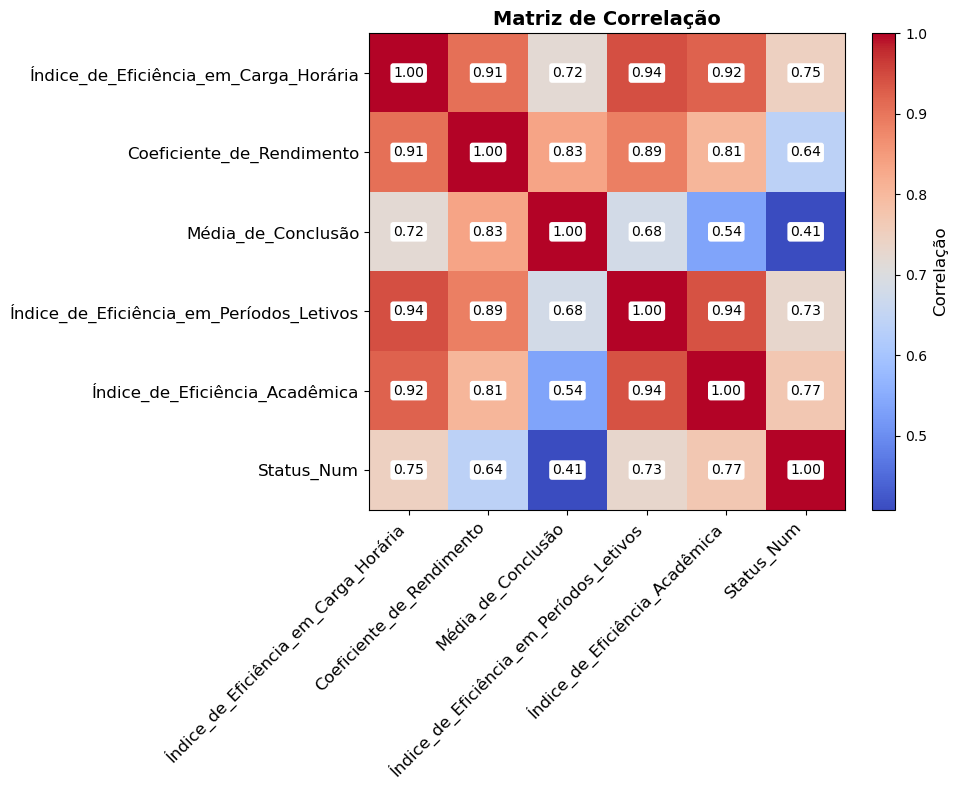

In [68]:
# Criar uma cópia do DataFrame para preservar os dados originais
df = df_alunos.copy()

# Codificar a variável Status (CONCLUÍDO = 1, DESLIGADO = 0)
df['Status_Num'] = df['Status'].map({'CONCLUÍDO': 1, 'DESLIGADO': 0})

# Definir as variáveis de interesse
variaveis = [
    'Índice_de_Eficiência_em_Carga_Horária',
    'Coeficiente_de_Rendimento',
    'Média_de_Conclusão',
    'Índice_de_Eficiência_em_Períodos_Letivos',
    'Índice_de_Eficiência_Acadêmica',
    'Status_Num'  
]

# Calcular a matriz de correlação
matriz_correlacao = df[variaveis].corr()

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.get_cmap('coolwarm')

# Exibir a matriz de correlação com bordas brancas entre as células
im = ax.imshow(matriz_correlacao, cmap=cmap, interpolation='nearest')

# Adicionar a barra de cores
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Correlação', fontsize=12)

# Adicionar rótulos nos eixos
ax.set_xticks(np.arange(len(variaveis)))
ax.set_yticks(np.arange(len(variaveis)))
ax.set_xticklabels(variaveis, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(variaveis, fontsize=12)

# Adicionar os valores numéricos de correlação nas células
for i in range(len(variaveis)):
    for j in range(len(variaveis)):
        ax.text(j, i, f'{matriz_correlacao.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontsize=10,
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

# Adicionar título
plt.title('Matriz de Correlação', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


In [19]:
# Criar widgets para seleção de curso e status
curso_options = df_alunos['Curso'].unique().tolist()
status_options = df_alunos['Status'].unique().tolist()

curso_dropdown = widgets.Dropdown(options=['Todos'] + curso_options, description='Curso:')
status_dropdown = widgets.Dropdown(options=['Todos'] + status_options, description='Status:')


def plot_quan_distribuicao(curso, status):
        
    df_filtrado = df_alunos.copy()
    
     # Aplicar filtros se necessário
    if curso != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Curso'] == curso]
    
    if status != 'Todos':
        df_filtrado = df_filtrado[df_filtrado['Status'] == status]
    
    variaveis = [
        'Índice_de_Eficiência_em_Carga_Horária',
        'Coeficiente_de_Rendimento',
        'Média_de_Conclusão',
        'Índice_de_Eficiência_em_Períodos_Letivos',
        'Índice_de_Eficiência_Acadêmica'  
    ]
    
    df_filtrado = df_filtrado[variaveis]
    sns.pairplot(data=df_filtrado, height=3)
    plt.show()

# Criar a interação
interact(plot_quan_distribuicao, curso=curso_dropdown, status=status_dropdown);

interactive(children=(Dropdown(description='Curso:', options=('Todos', 'ENFERMAGEM', 'CIÊNCIA E TECNOLOGIA', '…